In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import plotly.express as px
import plotly.graph_objects as go 
from plotly.subplots import make_subplots
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import joblib
warnings.filterwarnings("ignore")

# Set display options
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)
plt.style.use('seaborn-v0_8-darkgrid')


In [6]:
#1. Data loading and exploration
#Loading the dataset
df = df = pd.read_csv('Sample_superstore_dataset.csv', encoding='latin1')

#Initial peek at the data
print("Initial Data Preview:")
print(df.shape)

#Display basic overview
print("\nDataset Overview:")
print(df.info())


Initial Data Preview:
(9994, 21)

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  

In [7]:
print("\nFirst 5 rows of the dataset:")
print(df.head(5))


First 5 rows of the dataset:
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Regio

In [8]:
print("Missing Values:", df.isnull().sum())

Missing Values: Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [9]:
#Reviewing the columns
print("Column Descriptions:")
for col in df.columns:
    print(f"{col}: {df[col].dtype}, Unique Values: {df[col].nunique()}")

Column Descriptions:
Row ID: int64, Unique Values: 9994
Order ID: object, Unique Values: 5009
Order Date: object, Unique Values: 1237
Ship Date: object, Unique Values: 1334
Ship Mode: object, Unique Values: 4
Customer ID: object, Unique Values: 793
Customer Name: object, Unique Values: 793
Segment: object, Unique Values: 3
Country: object, Unique Values: 1
City: object, Unique Values: 531
State: object, Unique Values: 49
Postal Code: int64, Unique Values: 631
Region: object, Unique Values: 4
Product ID: object, Unique Values: 1862
Category: object, Unique Values: 3
Sub-Category: object, Unique Values: 17
Product Name: object, Unique Values: 1850
Sales: float64, Unique Values: 5825
Quantity: int64, Unique Values: 14
Discount: float64, Unique Values: 12
Profit: float64, Unique Values: 7287


In [10]:
print("\nBasic summary for all columns:")
for col in df.columns:
    print(f"Column: {col}")
    print(f"  Data type: {df[col].dtype}")
    print(f"  Unique values: {df[col].nunique()}")


Basic summary for all columns:
Column: Row ID
  Data type: int64
  Unique values: 9994
Column: Order ID
  Data type: object
  Unique values: 5009
Column: Order Date
  Data type: object
  Unique values: 1237
Column: Ship Date
  Data type: object
  Unique values: 1334
Column: Ship Mode
  Data type: object
  Unique values: 4
Column: Customer ID
  Data type: object
  Unique values: 793
Column: Customer Name
  Data type: object
  Unique values: 793
Column: Segment
  Data type: object
  Unique values: 3
Column: Country
  Data type: object
  Unique values: 1
Column: City
  Data type: object
  Unique values: 531
Column: State
  Data type: object
  Unique values: 49
Column: Postal Code
  Data type: int64
  Unique values: 631
Column: Region
  Data type: object
  Unique values: 4
Column: Product ID
  Data type: object
  Unique values: 1862
Column: Category
  Data type: object
  Unique values: 3
Column: Sub-Category
  Data type: object
  Unique values: 17
Column: Product Name
  Data type: object


In [14]:
#2. Data Preprocessing and Feature Engineering
#Data Cleaning
print(f"Original data shape: {df.shape}")

# Remove rows with missing values
df_clean = df.dropna()

# Remove rows with zero or negative prices
df_clean = df_clean[df_clean['Sales'] > 0]  

#Remove duplicate rows
df_clean = df_clean.drop_duplicates()

# Convert 'Date' to datetime format
df_clean['Order Date'] = pd.to_datetime(df_clean['Order Date'])
df_clean['Ship Date'] = pd.to_datetime(df_clean['Ship Date'])


print(f"\n Final cleaned data shape: {df_clean.shape}")
print(f"Data retention rate: {len(df_clean)/len(df)*100:.01f}%")

Original data shape: (9994, 21)

 Final cleaned data shape: (9994, 21)
Data retention rate: 100.0%


In [15]:
#Calculate RFM metrics
#Define the reference date
reference_date = df_clean['Order Date'].max() + timedelta(days=1)
print(f"Reference date for RFM calculation: {reference_date}")

# Create RFM table
rfm = df_clean.groupby('Customer ID').agg({
    'Order Date': lambda x: (reference_date - x.max()).days,  # Recency
    'Order ID': 'count',                                      # Frequency
    'Sales': 'sum'                                            # Monetary
})

#rename columns
rfm.columns = ['Recency', 'Frequency', 'Monetary']

# Reset index
rfm = rfm.reset_index()

print("\nRFM Table Summary:")
print(rfm.describe())

#Display sample RFM data
print("\nSample RFM Data:")
print(rfm.head(10))

Reference date for RFM calculation: 2017-12-31 00:00:00

RFM Table Summary:
           Recency   Frequency      Monetary
count   793.000000  793.000000    793.000000
mean    147.802018   12.602774   2896.848500
std     186.211051    6.242559   2628.670117
min       1.000000    1.000000      4.833000
25%      31.000000    8.000000   1146.050000
50%      76.000000   12.000000   2256.394000
75%     184.000000   16.000000   3785.276000
max    1166.000000   37.000000  25043.050000

Sample RFM Data:
  Customer ID  Recency  Frequency   Monetary
0    AA-10315      185         11   5563.560
1    AA-10375       20         15   1056.390
2    AA-10480      260         12   1790.512
3    AA-10645       56         18   5086.935
4    AB-10015      416          6    886.156
5    AB-10060       55         18   7755.620
6    AB-10105       42         20  14473.571
7    AB-10150       42         12    966.710
8    AB-10165       26         14   1113.838
9    AB-10255      167         14    914.532


In [18]:
print(df_clean.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')


In [19]:
#Add additional customer features
#Average order value
rfm['Average_Order_Value'] = rfm['Monetary'] / rfm['Frequency']

# Number of unique products purchased per customer
products_per_customer = df_clean.groupby('Customer ID')['Product Name'].nunique().reset_index()
products_per_customer.columns = ['Customer ID', 'Unique_Products']

# Total transactions per customer
transactions_per_customer = df_clean.groupby('Customer ID').size().reset_index(name="Total_Transactions")

# Merge into RFM table
rfm = rfm.merge(products_per_customer, on='Customer ID', how='left')
rfm = rfm.merge(transactions_per_customer, on='Customer ID', how='left')

# Calculate product diversity, avoid division by zero
rfm['Product_Diversity'] = rfm['Unique_Products'] / rfm['Total_Transactions']
rfm['Product_Diversity'] = rfm['Product_Diversity'].fillna(0)

print("\nEnhanced customer features:")
print(rfm.columns.tolist())
print("\nSample enhanced data:")
print(rfm.head(10))


Enhanced customer features:
['Customer ID', 'Recency', 'Frequency', 'Monetary', 'Average_Order_Value', 'Unique_Products', 'Total_Transactions', 'Product_Diversity']

Sample enhanced data:
  Customer ID  Recency  Frequency   Monetary  Average_Order_Value  \
0    AA-10315      185         11   5563.560           505.778182   
1    AA-10375       20         15   1056.390            70.426000   
2    AA-10480      260         12   1790.512           149.209333   
3    AA-10645       56         18   5086.935           282.607500   
4    AB-10015      416          6    886.156           147.692667   
5    AB-10060       55         18   7755.620           430.867778   
6    AB-10105       42         20  14473.571           723.678550   
7    AB-10150       42         12    966.710            80.559167   
8    AB-10165       26         14   1113.838            79.559857   
9    AB-10255      167         14    914.532            65.323714   

   Unique_Products  Total_Transactions  Product_Div

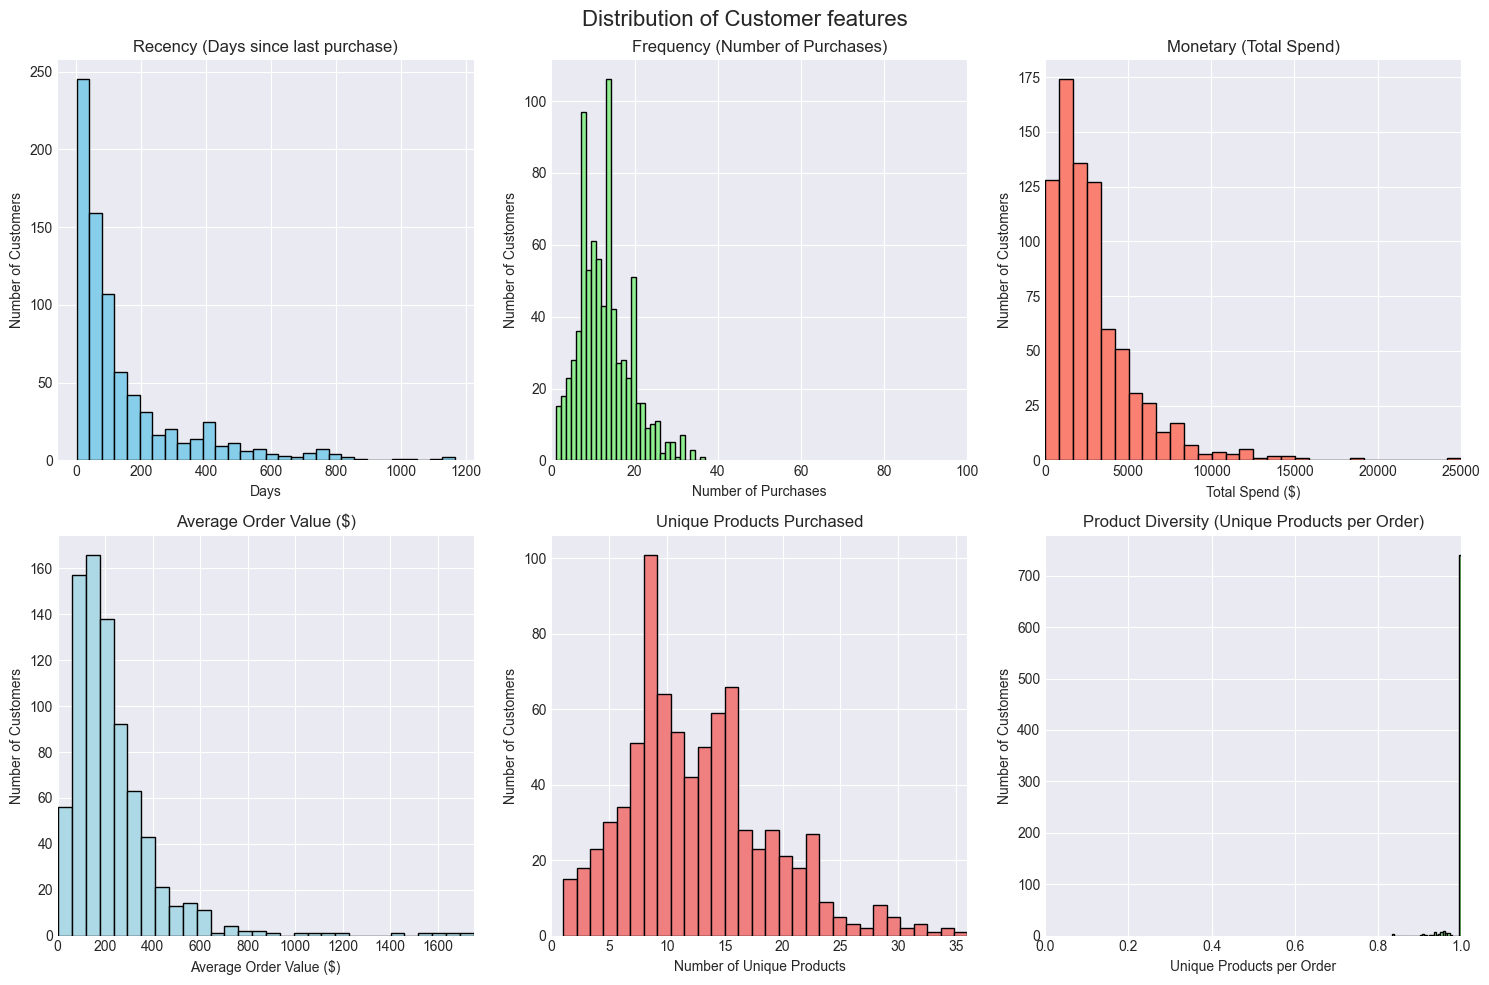

In [20]:
#Visualization of RFM Metrics
fig,axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Distribution of Customer features', fontsize=16)

#Recency
axes[0, 0].hist(rfm['Recency'], bins=30, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Recency (Days since last purchase)')
axes[0, 0].set_xlabel('Days')
axes[0, 0].set_ylabel('Number of Customers')

#Frequency
axes[0, 1].hist(rfm['Frequency'], bins=30, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Frequency (Number of Purchases)')
axes[0, 1].set_xlabel('Number of Purchases')
axes[0, 1].set_xlim(0, 100) #limit x-axis for better visibility
axes[0, 1].set_ylabel('Number of Customers')

#Monetary
axes[0, 2].hist(rfm['Monetary'], bins=30, color='salmon', edgecolor='black')
axes[0, 2].set_title('Monetary (Total Spend)')
axes[0, 2].set_xlabel('Total Spend ($)')
axes[0, 2].set_xlim(0, rfm['Monetary'].max()) #limit x-axis for better visibility
axes[0, 2].set_ylabel('Number of Customers')

#Average Order Value
axes[1, 0].hist(rfm['Average_Order_Value'], bins=30, color='lightblue', edgecolor='black')
axes[1, 0].set_title('Average Order Value ($)')
axes[1, 0].set_xlabel('Average Order Value ($)')
axes[1, 0].set_xlim(0, rfm['Average_Order_Value'].max()) #limit x-axis for better visibility
axes[1, 0].set_ylabel('Number of Customers')

#Unique Products
axes[1, 1].hist(rfm['Unique_Products'], bins=30, color='lightcoral', edgecolor='black')
axes[1, 1].set_title('Unique Products Purchased')
axes[1, 1].set_xlabel('Number of Unique Products')
axes[1, 1].set_xlim(0, rfm['Unique_Products'].max()) #limit x-axis for better visibility
axes[1, 1].set_ylabel('Number of Customers')

#Product Diversity
axes[1, 2].hist(rfm['Product_Diversity'], bins=30, color='lightgreen', edgecolor='black')
axes[1, 2].set_title('Product Diversity (Unique Products per Order)')
axes[1, 2].set_xlabel('Unique Products per Order')
axes[1, 2].set_xlim(0, rfm['Product_Diversity'].max()) #limit x-axis for better visibility
axes[1, 2].set_ylabel('Number of Customers')

plt.tight_layout()
plt.show()

In [21]:
#3. Customer Segmentation with K-Means Clustering
#Selecting features for clustering
features = rfm[['Recency', 'Frequency', 'Monetary', 'Average_Order_Value', 'Unique_Products', 'Product_Diversity']]
X = rfm[features.columns]

#Handle outliers using IQR methond
Q1 = X.quantile(0.25)
q3 = X.quantile(0.75)
IQR = q3 - Q1

#Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

# Remove outliers
print("Removing outliers based on IQR method...")
mask = ~((X < lower_bound) | (X > upper_bound)).any(axis=1)
X_clean = X[mask]
rfm_clean = rfm[mask].reset_index(drop=True)

print(f"Original data: {len(X)} customers")
print(f"After outlier removal: {len(X_clean)} customers")
print(f"Outliers removed: {len(X) - len(X_clean)} ({(len(X) - len(X_clean)) / len(X) * 100:.1f}%)")

#Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean)

print("\nFeatures have been scaled to have mean=0 and std=1")

Removing outliers based on IQR method...
Original data: 793 customers
After outlier removal: 613 customers
Outliers removed: 180 (22.7%)

Features have been scaled to have mean=0 and std=1


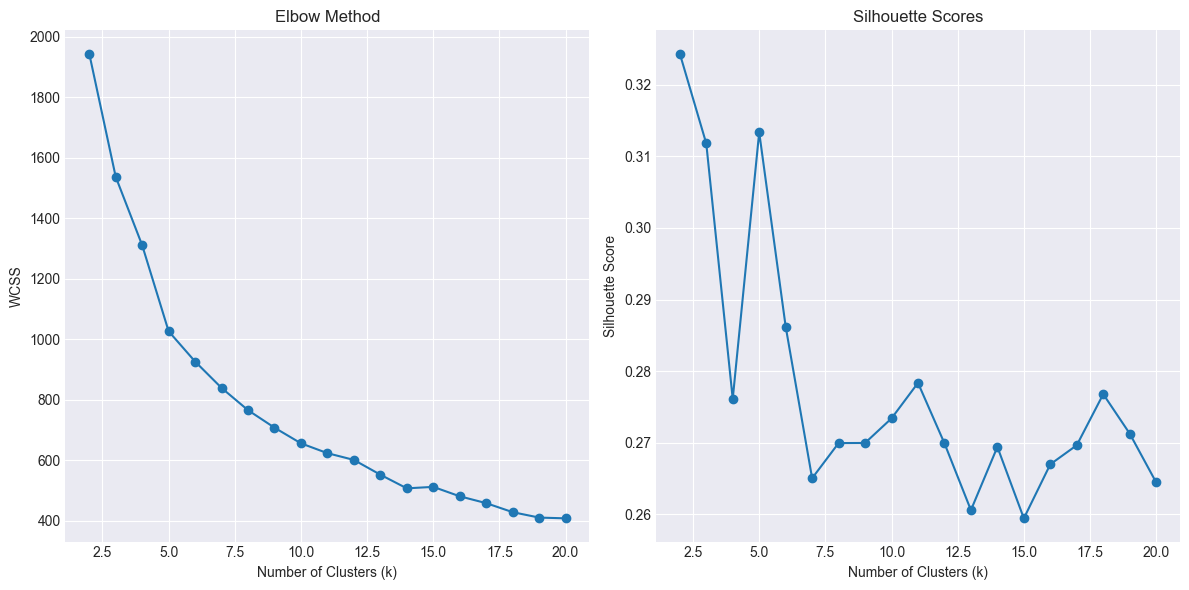

Optimal number of clusters (k) based on silhouette scores: 2
silhouette_score for k=2: 0.324


In [23]:
#Elbow method to find optimal k
wcss = []
silhouette_scores = []
K = range(2, 21)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_, n_jobs=1))

#Plot elbow curve and silhouette scores
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Elbow curve
ax1.plot(K, wcss, marker='o')
ax1.set_title('Elbow Method')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('WCSS')
ax1.grid(True)

# Silhouette scores
ax2.plot(K, silhouette_scores, marker='o')
ax2.set_title('Silhouette Scores')
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2

plt.tight_layout()
plt.show()

#Find optimal k based on silhouette scores
optimal_k = K[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters (k) based on silhouette scores: {optimal_k}")
print(f"silhouette_score for k={optimal_k}: {max(silhouette_scores):.3f}")

In [25]:
#Apply K-Means clustering
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
Clusters = kmeans.fit_predict(X_scaled)

#Add cluster labels to dataframe
rfm_clean['Cluster'] = Clusters

#Calculate cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=features.columns)
cluster_centers_df['Cluster'] = range(optimal_k)    

print("Cluster Centers (Original Scale):")
print(cluster_centers_df.round(2))

#Cluster sizes
print("\nCluster Sizes:")
cluster_sizes = rfm_clean['Cluster'].value_counts().sort_index()
for cluster, size in cluster_sizes.items():
    print(f"Cluster {cluster}: {size} customers ({size / len(rfm_clean)* 100:.2f}%)")


Cluster Centers (Original Scale):
   Recency  Frequency  Monetary  Average_Order_Value  Unique_Products  \
0    76.13      11.48   3880.75               341.89            11.48   
1    65.83       7.82   1045.87               134.61             7.82   
2    64.36      15.83   2318.13               147.92            15.83   
3    84.12      21.71   4908.14               229.73            21.71   
4   293.18       9.08   1483.77               162.74             9.08   

   Product_Diversity  Cluster  
0                1.0        0  
1                1.0        1  
2                1.0        2  
3                1.0        3  
4                1.0        4  

Cluster Sizes:
Cluster 0: 120 customers (19.58%)
Cluster 1: 186 customers (30.34%)
Cluster 2: 155 customers (25.29%)
Cluster 3: 65 customers (10.60%)
Cluster 4: 87 customers (14.19%)


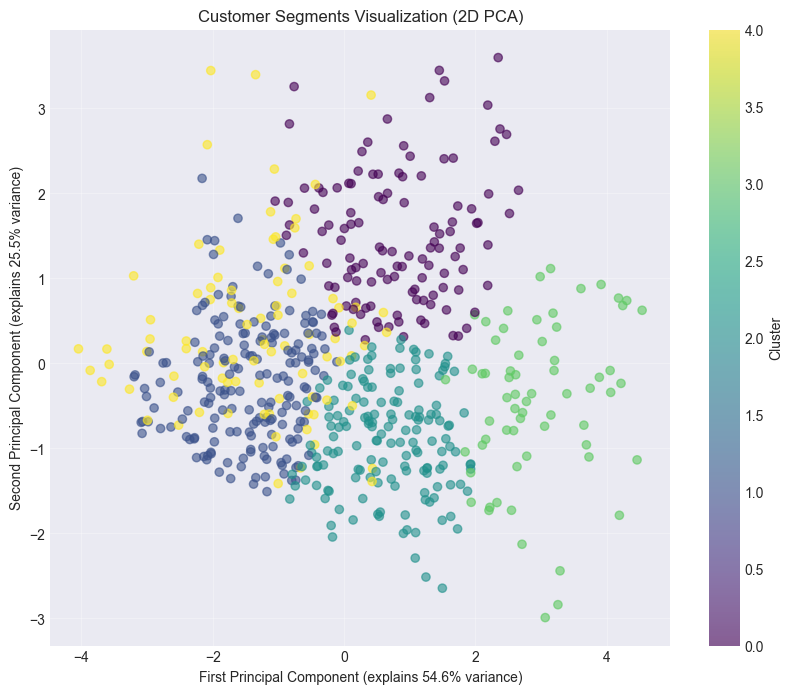

In [26]:
#Apply PCA for 2D visualizations
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

#Create scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c= Clusters, cmap='viridis', alpha=0.6)
plt.xlabel(f'First Principal Component (explains {pca.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'Second Principal Component (explains {pca.explained_variance_ratio_[1]:.1%} variance)')
plt.title('Customer Segments Visualization (2D PCA)')
plt.colorbar(scatter, label='Cluster')
plt.grid(True, alpha=0.3)
plt.show()



Average Values by Cluster:
         Recency  Frequency  Monetary  Average_Order_Value  Unique_Products  \
Cluster                                                                       
0          76.13      11.48   3880.75               341.89            11.48   
1          65.83       7.82   1045.87               134.61             7.82   
2          64.36      15.83   2318.13               147.92            15.83   
3          84.12      21.71   4908.14               229.73            21.71   
4         293.18       9.08   1483.77               162.74             9.08   

         Product_Diversity  
Cluster                     
0                      1.0  
1                      1.0  
2                      1.0  
3                      1.0  
4                      1.0  


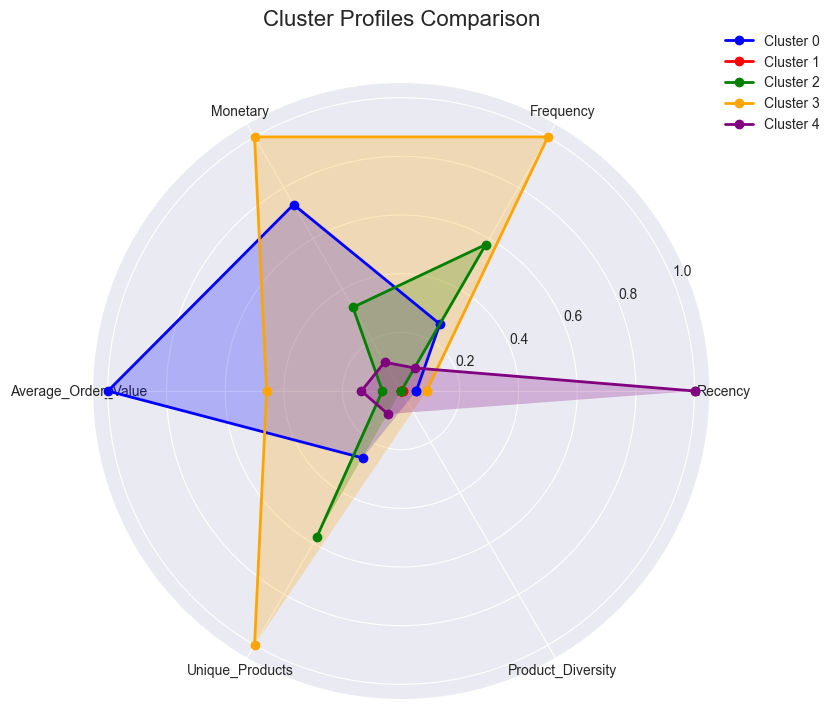

In [27]:
#Analyze Cluster Characteristics
# Calculate cluster profiles
features = ['Recency', 'Frequency', 'Monetary', 'Average_Order_Value', 'Unique_Products', 'Product_Diversity']
cluster_profiles = rfm_clean.groupby('Cluster')[features].mean().round(2)
print("Average Values by Cluster:")
print(cluster_profiles)

# Create radar chart for cluster comparison
from math import pi

# Normalize cluster profiles for radar chart
cluster_profiles_normalized = (cluster_profiles - cluster_profiles.min()) / (cluster_profiles.max() - cluster_profiles.min())

# Set up radar chart
categories = features
fig = plt.figure(figsize=(12, 8))

# Number of variables
num_vars = len(categories)

# Compute angle of each axis
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]

# Initialize the plot
ax = plt.subplot(111, polar=True)

# Draw one axis per variable and add labels
plt.xticks(angles[:-1], categories)

# Plot each cluster
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown']
for idx, row in cluster_profiles_normalized.iterrows():
    values = row.values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, 'o-', linewidth=2, label=f'Cluster {idx}', color=colors[idx])
    ax.fill(angles, values, alpha=0.25, color=colors[idx])

plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.title('Cluster Profiles Comparison', size=16, y=1.08)
plt.show()

In [28]:
#Define customer personas based on cluster characteristics

def create_persona(cluster_data):
    recency = cluster_data['Recency']
    frequency = cluster_data['Frequency']
    monetary = cluster_data['Monetary']
    avg_order = cluster_data['Average_Order_Value']
    products = cluster_data['Unique_Products']

    # Create persona based on metrics
    if recency < 50 and frequency > 20 and monetary > 2000:
        return "Champions", "Best customers - Recent, frequent, high spenders"
    elif recency < 100 and frequency > 10 and monetary > 1000:
        return "Loyal Customers", "Regular customers with good spending"
    elif recency > 200 and monetary > 1000:
        return "At Risk", "High-value customers who haven't purchased recently"
    elif frequency < 5 and monetary < 500:
        return "New Customers", "Recently acquired with low engagement"
    else:
        return "Potential Loyalists", "Showing promise, need nurturing"

# Create personas for each cluster
personas = {}
for idx, row in cluster_profiles.iterrows():
    name, description = create_persona(row)
    personas[idx] = {
        'name': name,
        'description': description,
        'size': cluster_sizes[idx],
        'metrics': row.to_dict()
    }

# Display personas
print("CUSTOMER PERSONAS BY CLUSTER\n" + "="*50)
for cluster_id, persona in personas.items():
    print(f"\nCluster {cluster_id}: {persona['name']}")
    print(f"Description: {persona['description']}")
    print(f"Size: {persona['size']} customers")
    print("Key Metrics:")
    for metric, value in persona['metrics'].items():
        print(f"  - {metric}: {value:.2f}")

CUSTOMER PERSONAS BY CLUSTER

Cluster 0: Loyal Customers
Description: Regular customers with good spending
Size: 120 customers
Key Metrics:
  - Recency: 76.13
  - Frequency: 11.48
  - Monetary: 3880.75
  - Average_Order_Value: 341.89
  - Unique_Products: 11.48
  - Product_Diversity: 1.00

Cluster 1: Potential Loyalists
Description: Showing promise, need nurturing
Size: 186 customers
Key Metrics:
  - Recency: 65.83
  - Frequency: 7.82
  - Monetary: 1045.87
  - Average_Order_Value: 134.61
  - Unique_Products: 7.82
  - Product_Diversity: 1.00

Cluster 2: Loyal Customers
Description: Regular customers with good spending
Size: 155 customers
Key Metrics:
  - Recency: 64.36
  - Frequency: 15.83
  - Monetary: 2318.13
  - Average_Order_Value: 147.92
  - Unique_Products: 15.83
  - Product_Diversity: 1.00

Cluster 3: Loyal Customers
Description: Regular customers with good spending
Size: 65 customers
Key Metrics:
  - Recency: 84.12
  - Frequency: 21.71
  - Monetary: 4908.14
  - Average_Order_Valu

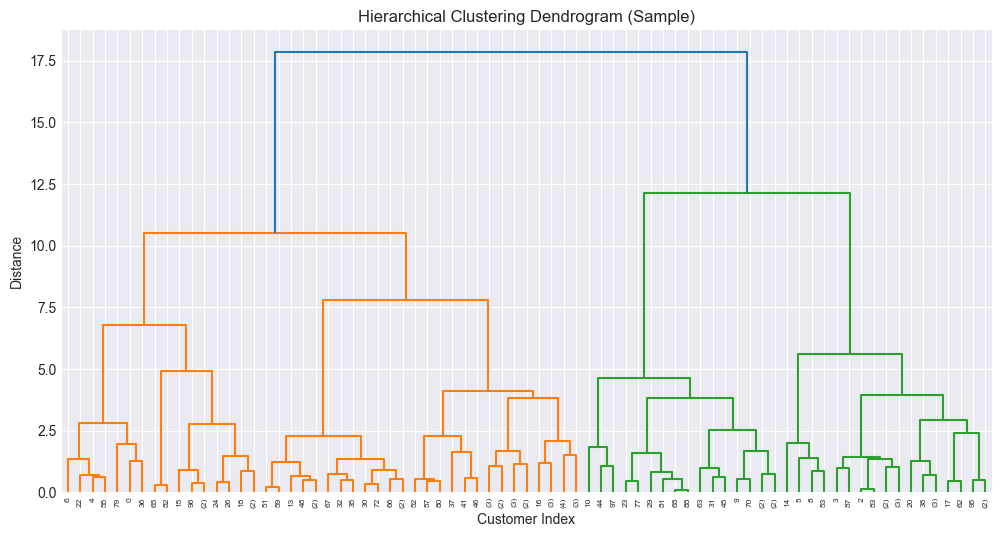


Similarity between K-Means and Hierarchical Clustering: 0.428
(1.0 = identical, 0.0 = random)


In [30]:
# Apply Hierarchical Clustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Create linkage matrix
# Sample data for dendrogram (full dataset would be too large to visualize)
sample_indices = np.random.choice(len(X_scaled), size=min(100, len(X_scaled)), replace=False)
X_sample = X_scaled[sample_indices]

# Perform hierarchical clustering
linkage_matrix = linkage(X_sample, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=6)
plt.title('Hierarchical Clustering Dendrogram (Sample)')
plt.xlabel('Customer Index')
plt.ylabel('Distance')
plt.show()

# Apply Agglomerative Clustering on full dataset
agg_clustering = AgglomerativeClustering(n_clusters=optimal_k)
agg_clusters = agg_clustering.fit_predict(X_scaled)

# Compare with K-Means
from sklearn.metrics import adjusted_rand_score
similarity = adjusted_rand_score(Clusters, agg_clusters)
print(f"\nSimilarity between K-Means and Hierarchical Clustering: {similarity:.3f}")
print("(1.0 = identical, 0.0 = random)")

In [45]:
# Prepare data for market basket analysis

# Group products by transaction (not invoice) for all products
#Created category basket as by product is not pulling up any data
basket_category = df_clean.groupby(['Order ID', 'Category'])['Quantity'].sum().unstack().fillna(0)
basket_sets_category = basket_category.applymap(lambda x: 1 if x > 0 else 0)


# Convert to binary (0/1) matrix
basket_sets_category = basket_sets_category.applymap(lambda x: 1 if x > 0 else 0)

print(f"Transaction matrix shape: {basket_sets_category.shape}")
print(f"Number of transactions: {basket_sets_category.shape[0]}")
print(f"Number of unique categories: {basket_sets_category.shape[1]}")

print("\nSample transaction matrix (first 5 transactions, first 5 categories):")
print(basket_sets_category.iloc[:5, :5])


Transaction matrix shape: (5009, 3)
Number of transactions: 5009
Number of unique categories: 3

Sample transaction matrix (first 5 transactions, first 5 categories):
Category        Furniture  Office Supplies  Technology
Order ID                                              
CA-2014-100006          0                0           1
CA-2014-100090          1                1           0
CA-2014-100293          0                1           0
CA-2014-100328          0                1           0
CA-2014-100363          0                1           0


In [46]:
# Apply Apriori algorithm
# min_support: Minimum fraction of transactions containing the itemset
min_support = 0.002  # Items appearing in at least 0.2% of transactions

print(f"Finding frequent itemsets with minimum support of {min_support*100}%...")
frequent_itemsets = apriori(basket_sets_category, min_support=min_support, use_colnames=True)

print(f"\nFound {len(frequent_itemsets)} frequent itemsets")
print("\nTop 10 most frequent itemsets:")
frequent_itemsets.sort_values('support', ascending=False).head(10)

Finding frequent itemsets with minimum support of 0.2%...

Found 7 frequent itemsets

Top 10 most frequent itemsets:


,support,itemsets
1,0.747055,(Office Supplies)
0,0.352166,(Furniture)
2,0.308245,(Technology)
3,0.193452,"(Office Supplies, Furniture)"
5,0.182472,"(Office Supplies, Technology)"
4,0.096227,"(Technology, Furniture)"
6,0.064684,"(Office Supplies, Technology, Furniture)"


In [48]:
# Generate association rules
min_confidence = 0.05  # Rules with at least 5% confidence

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)
print(f"Generated {len(rules)} association rules")

# Add additional metrics
rules['antecedent_len'] = rules['antecedents'].apply(lambda x: len(x))
rules['consequent_len'] = rules['consequents'].apply(lambda x: len(x))

# Display top rules by lift
top_rules = rules.sort_values('lift', ascending=False).head(10)
for i, (_, rule) in enumerate(top_rules.iterrows(), 1):
    antecedent = ', '.join(list(rule['antecedents']))
    consequent = ', '.join(list(rule['consequents']))
    print(f"\nRule {i}:")
    print(f"  If customer buys: {antecedent}")
    print(f"  Then likely to buy: {consequent}")
    print(f"  Support: {rule['support']:.3f}")
    print(f"  Confidence: {rule['confidence']:.3f}")
    print(f"  Lift: {rule['lift']:.3f}")


Generated 12 association rules

Rule 1:
  If customer buys: Technology
  Then likely to buy: Office Supplies, Furniture
  Support: 0.065
  Confidence: 0.210
  Lift: 1.085

Rule 2:
  If customer buys: Office Supplies, Furniture
  Then likely to buy: Technology
  Support: 0.065
  Confidence: 0.334
  Lift: 1.085

Rule 3:
  If customer buys: Furniture
  Then likely to buy: Office Supplies, Technology
  Support: 0.065
  Confidence: 0.184
  Lift: 1.007

Rule 4:
  If customer buys: Office Supplies, Technology
  Then likely to buy: Furniture
  Support: 0.065
  Confidence: 0.354
  Lift: 1.007

Rule 5:
  If customer buys: Office Supplies
  Then likely to buy: Technology, Furniture
  Support: 0.065
  Confidence: 0.087
  Lift: 0.900

Rule 6:
  If customer buys: Technology, Furniture
  Then likely to buy: Office Supplies
  Support: 0.065
  Confidence: 0.672
  Lift: 0.900

Rule 7:
  If customer buys: Technology
  Then likely to buy: Furniture
  Support: 0.096
  Confidence: 0.312
  Lift: 0.886

Rule 

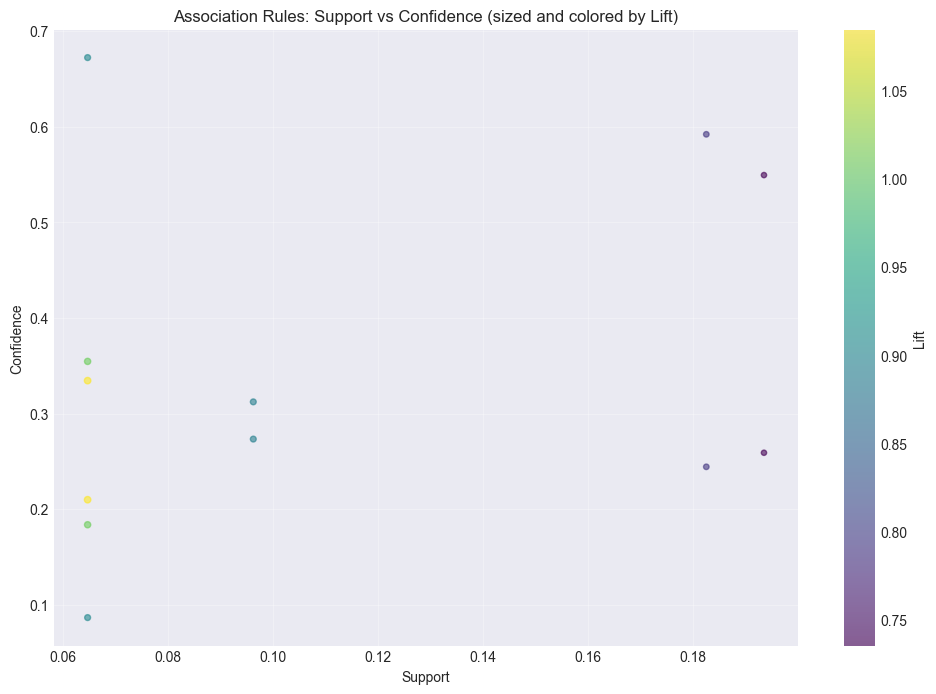


High-quality rules (Lift > 2, Confidence > 50%): 0


In [49]:
# Create scatter plot of rules
plt.figure(figsize=(12, 8))
scatter = plt.scatter(rules['support'], rules['confidence'],
                     c=rules['lift'], s=rules['lift']*20,
                     alpha=0.6, cmap='viridis')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules: Support vs Confidence (sized and colored by Lift)')
plt.colorbar(scatter, label='Lift')
plt.grid(True, alpha=0.3)
plt.show()

# Filter high-quality rules
high_quality_rules = rules[(rules['lift'] > 2) & (rules['confidence'] > 0.5)]
print(f"\nHigh-quality rules (Lift > 2, Confidence > 50%): {len(high_quality_rules)}")

In [51]:
#Product Recommendation Function
def get_recommendations(product, rules_df, max_recommendations=5):
    """
    Get product recommendations based on association rules
    """
    # Find rules where the product is in the antecedent
    relevant_rules = rules_df[rules_df['antecedents'].apply(lambda x: product in x)]

    if len(relevant_rules) == 0:
        return "No recommendations found for this product."

    # Sort by lift and get top recommendations
    relevant_rules = relevant_rules.sort_values('lift', ascending=False).head(max_recommendations)

    recommendations = []
    for idx, rule in relevant_rules.iterrows():
        consequent = ', '.join(list(rule['consequents']))
        recommendations.append({
            'Product': consequent,
            'Confidence': f"{rule['confidence']:.1%}",
            'Lift': f"{rule['lift']:.2f}"
        })

    return pd.DataFrame(recommendations)

# Test the recommendation engine
# Find popular products to test
popular_categories = df_clean['Category'].value_counts().head(20).index.tolist()

print("Category Recommendation Engine Demo")
print("=" * 50)
test_category = popular_categories[0]
print(f"\nRecommendations for: {test_category}")
print(get_recommendations(test_category, rules))

Category Recommendation Engine Demo

Recommendations for: Office Supplies
                 Product Confidence  Lift
0             Technology      33.4%  1.08
1              Furniture      35.4%  1.01
2  Technology, Furniture       8.7%  0.90
3             Technology      24.4%  0.79
4              Furniture      25.9%  0.74


In [52]:
#Business Insights and Recommendations

# Combine cluster analysis with purchase patterns
# Add cluster information to original transaction data
df_with_clusters = df_clean.merge(rfm_clean[['Customer ID', 'Cluster']], on='Customer ID')

# Analyze product preferences by cluster
cluster_products = df_with_clusters.groupby(['Cluster', 'Product Name'])['Quantity'].sum().reset_index()
cluster_products = cluster_products.sort_values(['Cluster', 'Quantity'], ascending=[True, False])

# Top 5 products per cluster
print("TOP 5 PRODUCTS BY CUSTOMER SEGMENT")
print("=" * 50)
for cluster in range(optimal_k):
    print(f"\nCluster {cluster} - {personas[cluster]['name']}:")
    top_products = cluster_products[cluster_products['Cluster'] == cluster].head(5)
    for idx, row in top_products.iterrows():
        print(f"  - {row['Product Name']}: {row['Quantity']} units")

TOP 5 PRODUCTS BY CUSTOMER SEGMENT

Cluster 0 - Loyal Customers:
  - Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back: 29 units
  - Polycom VVX 310 VoIP phone: 27 units
  - Staple envelope: 26 units
  - SAFCO Arco Folding Chair: 23 units
  - GBC Ibimaster 500 Manual ProClick Binding System: 21 units

Cluster 1 - Potential Loyalists:
  - Staples: 35 units
  - GBC Premium Transparent Covers with Diagonal Lined Pattern: 30 units
  - Southworth 100% Résumé Paper, 24lb.: 22 units
  - Ibico Plastic and Wire Spiral Binding Combs: 21 units
  - Staple envelope: 20 units

Cluster 2 - Loyal Customers:
  - Staples: 61 units
  - Easy-staple paper: 36 units
  - Global Stack Chair without Arms, Black: 31 units
  - Staples in misc. colors: 30 units
  - Storex Dura Pro Binders: 30 units

Cluster 3 - Loyal Customers:
  - Staples: 32 units
  - Iceberg Mobile Mega Data/Printer Cart : 25 units
  - Wilson Jones Clip & Carry Folder Binder Tool for Ring Binders, Clear: 25 units
  - Avery Reinforcem

In [53]:
# Generate comprehensive business recommendations
print("\nBUSINESS RECOMMENDATIONS")
print("=" * 70)

for cluster_id, persona in personas.items():
    print(f"\n{persona['name']} (Cluster {cluster_id})")
    print("-" * 50)

    metrics = persona['metrics']

    # Generate specific recommendations based on metrics
    if metrics['Recency'] < 50 and metrics['Frequency'] > 15:
        print("RETAIN: These are your best customers")
        print("  - Offer VIP programs and exclusive early access")
        print("  - Send personalized thank you messages")
        print("  - Provide premium customer service")

    elif metrics['Recency'] > 150 and metrics['Monetary'] > 1000:
        print("RE-ENGAGE: High-value customers at risk of churning")
        print("  - Send win-back campaigns with special offers")
        print("  - Conduct surveys to understand why they left")
        print("  - Offer personalized discounts on previously purchased items")

    elif metrics['Frequency'] < 5:
        print("DEVELOP: New or low-engagement customers")
        print("  - Create onboarding email sequences")
        print("  - Offer first-time buyer discounts")
        print("  - Recommend popular products to build trust")

    else:
        print("GROW: Customers with growth potential")
        print("  - Cross-sell complementary products")
        print("  - Implement loyalty programs")
        print("  - Send targeted product recommendations")

    # ROI Projections
    avg_value = metrics['Monetary'] / metrics['Frequency'] if metrics['Frequency'] > 0 else 0
    potential_revenue = persona['size'] * avg_value * 0.2  # Assume 20% response rate
    print(f"\n  Potential Revenue Impact: ${potential_revenue:,.0f}")


BUSINESS RECOMMENDATIONS

Loyal Customers (Cluster 0)
--------------------------------------------------
GROW: Customers with growth potential
  - Cross-sell complementary products
  - Implement loyalty programs
  - Send targeted product recommendations

  Potential Revenue Impact: $8,113

Potential Loyalists (Cluster 1)
--------------------------------------------------
GROW: Customers with growth potential
  - Cross-sell complementary products
  - Implement loyalty programs
  - Send targeted product recommendations

  Potential Revenue Impact: $4,975

Loyal Customers (Cluster 2)
--------------------------------------------------
GROW: Customers with growth potential
  - Cross-sell complementary products
  - Implement loyalty programs
  - Send targeted product recommendations

  Potential Revenue Impact: $4,540

Loyal Customers (Cluster 3)
--------------------------------------------------
GROW: Customers with growth potential
  - Cross-sell complementary products
  - Implement loyal

In [55]:
# Cross-selling opportunities from association rules
print("\n\nCROSS-SELLING OPPORTUNITIES")
print("=" * 70)

# Find the strongest cross-sell opportunities
strong_rules = rules[(rules['lift'] > 2) & (rules['confidence'] > 0.3) & (rules['antecedent_len'] == 1)]
strong_rules = strong_rules.sort_values('lift', ascending=False).head(10)

print("\nTop 10 Cross-Selling Opportunities:")
1
# Save results for future use
print("\nSaving analysis results...")

# Save cluster assignments
rfm_clean.to_csv('customer_segments.csv', index=False)
print("Customer segments saved to 'customer_segments.csv'")

# Save association rules
rules.to_csv('association_rules.csv', index=False)
print("Association rules saved to 'association_rules.csv'")

# Save cluster profiles
cluster_profiles.to_csv('cluster_profiles.csv')
print("Cluster profiles saved to 'cluster_profiles.csv'")

print("\nAnalysis complete! Results have been saved for deployment.")



CROSS-SELLING OPPORTUNITIES

Top 10 Cross-Selling Opportunities:

Saving analysis results...
Customer segments saved to 'customer_segments.csv'
Association rules saved to 'association_rules.csv'
Cluster profiles saved to 'cluster_profiles.csv'

Analysis complete! Results have been saved for deployment.
Customer segments saved to 'customer_segments.csv'
Association rules saved to 'association_rules.csv'
Cluster profiles saved to 'cluster_profiles.csv'

Analysis complete! Results have been saved for deployment.
